# Clustering
* unsupervised learning
* label없이 비슷한 특성을 가진 데이터들끼리 모아 그룹을 나누는 방법

### k-mean clustering
1. 집단 개수(N)를 선택한다.
2. 적당한 중심점(센트로이드)을 N개를 임의로 선택한다.
3. 데이터 포인트와 선택한 중심점에서 사이의 거리를 계산하여 가장 가까운 점을 해당 데이터가 속한 집단으로 정한다.
4. 집단의 데이터 평균을 계산하고 그 점을 새로운 중심점으로 정한다.
5. 중심점의 위치가 바뀌지 않을 때까지 3-4과정을 반복한다.

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris() # 분꽃
iris.target_names # 3종류의 분꽃 분류하기
iris.feature_names # features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

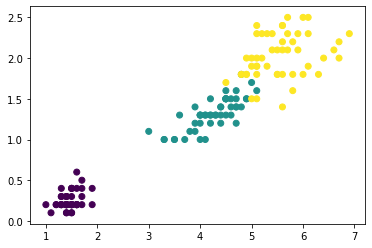

In [152]:
Xall=iris["data"] 
y=iris["target"] # setosa=0, versicolor=1, virginica=2
X=[Xall[:,2],Xall[:,3]]
plt.scatter(X[0],X[1],c=y)

* 분꽃 예시에는 집단이 3개이므로 3개의 중심점을 임의로 선택한다.

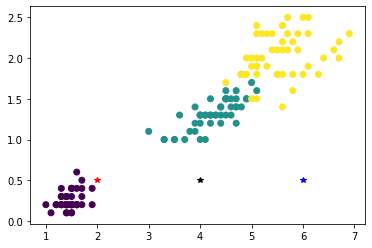

In [142]:
plt.scatter(X[0],X[1],c=y)
plt.plot([2],[0.5],'r*')
plt.plot([4],[0.5],'k*')
plt.plot([6],[0.5],'b*')

In [91]:
temp=[]
for (i,j) in zip(X[0],X[1]):
    r1=(i-2)**2 + (j-0.5)**2
    r2=(i-4)**2 + (j-0.5)**2
    r3=(i-6)**2 + (j-0.5)**2
    m=min(r1,r2,r3)
    temp.append([r1,r2,r3].index(m))
    n=n+1

In [138]:
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
r1=np.mean(x1[0]),np.mean(x1[1])
r2=np.mean(x2[0]),np.mean(x2[1])
r3=np.mean(x3[0]),np.mean(x3[1])

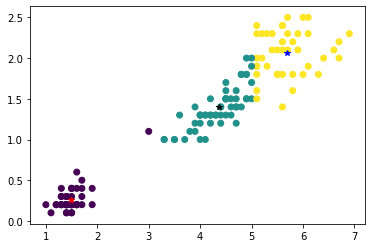

In [141]:
plt.scatter(X[0],X[1],c=temp)
plt.plot(r1[0],r1[1],'r*')
plt.plot(r2[0],r2[1],'k*')
plt.plot(r3[0],r3[1],'b*')

### sklearn.cluster.KMeans

In [153]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
data = np.transpose(X)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

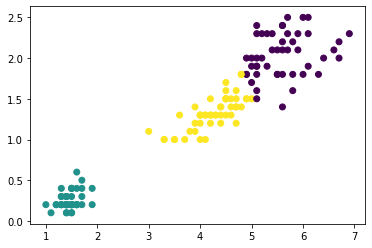

In [157]:
plt.scatter(X[0],X[1],c=kmeans.labels_)

### Inertia 
sum of distances of data points to their closest cluster center

In [174]:
kmeans.inertia_

6.541584461432288

In [177]:
kiner = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_ 

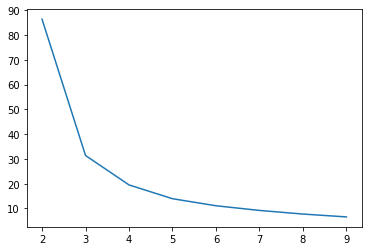

In [178]:
plt.plot(list(kiner.keys()), list(kiner.values()))